## MEWpy
Metabolic Engineering Workbench

Gecko model simulation example

In [1]:
# Using geckopy package.
from geckopy.gecko import GeckoModel

In [2]:
# Or using MEWpy implementation
# We strongly suggest using the MEWpy implementation, based on REFRAMED, 
# as it is considerably faster.

from mewpy.model.gecko import GeckoModel

In [3]:
model = GeckoModel('single-pool')


The Simulation class enables to easily perform simulations considering specific environmental conditions as well as other constraint, such protein knockouts or over/under expression. 
 

In [4]:
from mewpy.simulation import get_simulator

# Define environmental conditions (limit glucose consumption) 
envcond = {'r_1714_REV':(-10,1000)}

simul = get_simulator(model,envcond= envcond)

In [6]:
# FBA
result =simul.simulate()
print(result)

objective: 0.3254251070535797
Status: SStatus.OPTIMAL


In [7]:
# Other phenotype simulation methods can explicitly be defined

from mewpy.simulation import  SimulationMethod
result= simul.simulate(method=SimulationMethod.pFBA)
print(result)

objective: 625.2858244040947
Status: SStatus.OPTIMAL


In [8]:
# or 
result= simul.simulate(method='pFBA')
print(result)

objective: 625.2858244040947
Status: SStatus.OPTIMAL


In [11]:
# Flux values can be retreived from the simulation results object
reference = result.fluxes
print(reference)

{'r_0006': 0.05897178190637205, 'r_0070': 0.0, 'r_0094': 0.0, 'r_0099': 0.0, 'r_0200': 0.0, 'r_0461': 0.0, 'r_0465': 0.0, 'r_0484': 0.0, 'r_0500': 0.0, 'r_0695': 0.0, 'r_0970': 0.0011703588550074939, 'r_0971': 0.0, 'r_0972': 0.0007802392366716626, 'r_0973': 0.0019505980916791565, 'r_1008': 0.0, 'r_1009': 0.0, 'r_1619': 0.0, 'r_2113': 0.0, 'r_2114': 0.0, 'r_2213': 0.0, 'r_2214': 0.0, 'r_2215': 0.0, 'r_2216': 0.0, 'r_2217': 0.0, 'r_2218': 0.0, 'r_3240': 0.0, 'r_3241': 0.0, 'r_3242': 0.0, 'r_3243': 0.0, 'r_0964': 0.0, 'r_1028': 0.0, 'r_1096': 0.0, 'r_1097': 0.0, 'r_1098': 0.0, 'r_1099': 0.1161896510286426, 'r_1100': 0.0, 'r_1101': 0.0, 'r_1102': 0.0, 'r_1103': 0.0, 'r_1104': 0.0, 'r_1106': 0.0, 'r_1107': 0.0, 'r_1108': 0.0, 'r_1109': 0.0, 'r_1110': 5.822437973228578, 'r_1111': 0.0, 'r_1112': 0.0, 'r_1113': 0.0, 'r_1114': 0.0, 'r_1115': 2.1988917595219615, 'r_1116': 0.0, 'r_1118': 0.0, 'r_1119': 0.0, 'r_1120': 0.0, 'r_1121': 0.0, 'r_1122': 0.0, 'r_1123': 0.0, 'r_1124': 0.0, 'r_1125': 0.0, 

In [12]:
# Essential proteins
# Takes as argument the proteins prefix.
essential = simul.essential_proteins('draw_prot_')
print(essential)

['draw_prot_P00815', 'draw_prot_P04802', 'draw_prot_P04076', 'draw_prot_P00912', 'draw_prot_P06197', 'draw_prot_P07277', 'draw_prot_P29509', 'draw_prot_P09436', 'draw_prot_P32377', 'draw_prot_P07702', 'draw_prot_P29952', 'draw_prot_P06168', 'draw_prot_P32462', 'draw_prot_P41338', 'draw_prot_P25340', 'draw_prot_P00958', 'draw_prot_P05694', 'draw_prot_P28777', 'draw_prot_P32347', 'draw_prot_P10614', 'draw_prot_P11986', 'draw_prot_P33312', 'draw_prot_P28272', 'draw_prot_P18408', 'draw_prot_P03962', 'draw_prot_P50861', 'draw_prot_P28789', 'draw_prot_P32263', 'draw_prot_P38891', 'draw_prot_P17423', 'draw_prot_P04046', 'draw_prot_P07258', 'draw_prot_P40495', 'draw_prot_P07245', 'draw_prot_P04161', 'draw_prot_P38708', 'draw_prot_P00899', 'draw_prot_P06174', 'draw_prot_P46655', 'draw_prot_P31688', 'draw_prot_P09950', 'draw_prot_P21264', 'draw_prot_P18544', 'draw_prot_P07806', 'draw_prot_P39954', 'draw_prot_P26637', 'draw_prot_P38221', 'draw_prot_P07264', 'draw_prot_P13188', 'draw_prot_Q00764',

In [13]:
constraints ={'draw_prot_Q04396' : (2.3029771980628338e-07,1000),
              'draw_prot_P27515' : 0,
              'draw_prot_P53687' : (0.0,1000),
              'draw_prot_P81450' : 0
             }

In [14]:
result = simul.simulate(constraints=constraints)
print(result.fluxes['r_2111'])
print(result.fluxes['r_2056'])

0.3253412648314721
0.0


## GECKO model Optimization

The optimization is performed by defining an Evolutionary Algorithm Optimization Problem.
MEWpy can resort to inspyred as well as to jmetalpy packages to drive the optimization process.

To define a problem we start by identifiying the objective functions:

In [15]:
from mewpy.optimization.evaluation import BPCY,WYIELD

evaluator_1 = BPCY("r_2111", "r_1913",method=SimulationMethod.lMOMA) 
evaluator_2 = WYIELD("r_2111", "r_1913")


In [16]:
# creates a new KO optimization problem
from mewpy.problems import GeckoKOProblem

# The problem takes as parameters the model, the objectives, optional environmental conditions,
# and the maximum number of simultaneous KOs. Other parameters can be passed such as, for example, 
# target or, alternatively, non target proteins. If not provided, targets are all non essential proteins. 

problem = GeckoKOProblem(model, 
                          fevaluation=[evaluator_1,evaluator_2], 
                          envcond = envcond,
                          candidate_max_size = 6)

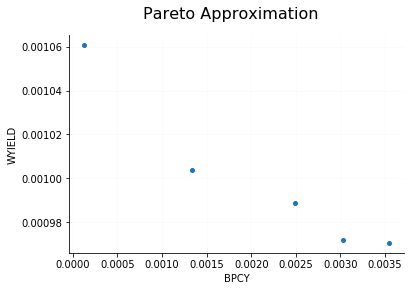

Gen    Eval|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
   0    100|  -0.000000  0.003541  0.000000  0.000378  0.000864|  0.000000  0.001061  0.000991  0.000911  0.000255|
   1    200|  0.000000  0.003541  0.000001  0.000738  0.001056|  0.000000  0.001061  0.000991  0.000979  0.000099|
   2    300|  0.000000  0.003541  0.000654  0.001107  0.001176|  0.000971  0.001061  0.000991  0.000991  0.000014|
   3    400|  0.000000  0.003555  0.001378  0.001517  0.001130|  0.000971  0.001070  0.000989  0.000995  0.000019|
   4    500|  0.000000  0.024898  0.002483  0.002656  0.003755|  0.000957  0.001070  0.000989  0.000997  0.000023|
   5    600|  0.000000  0.024898  0.002216  0.003381  0.005473|  0.000958  0.001070  0.000990  0.001002  0.000025|
   6    700|  0.000000  0.024899  0.002476  0.004998  0.007232|  0.000969  0.001070  0.000989  0.001006  0.000028|
   7    800|  0.000000  0.027351  0.001746  0.005779  0.008507|  0.000973  0.00

In [17]:
from mewpy.optimization import EA

# A new instance of the EA optimizer for the problem with a stopping criteria of 10 iterations (1000 evaluations)
# mp: use parallel processing (by default half of the available threads).
# visualizer: display the pareto front of the evaluated population.

ea = EA(problem, max_generations = 10, mp =True, visualizer = True)

# runs the optimization
final_pop = ea.run()


In [ ]:
# Save the solutions to a csv file
import mewpy.utils.utilities as util
util.population_to_csv(problem,final_pop,'results.csv')